Задача 1.
Перед вами результаты наблюдений длительности нахождения человека в очереди в зависимости от количества людей в этой очереди.


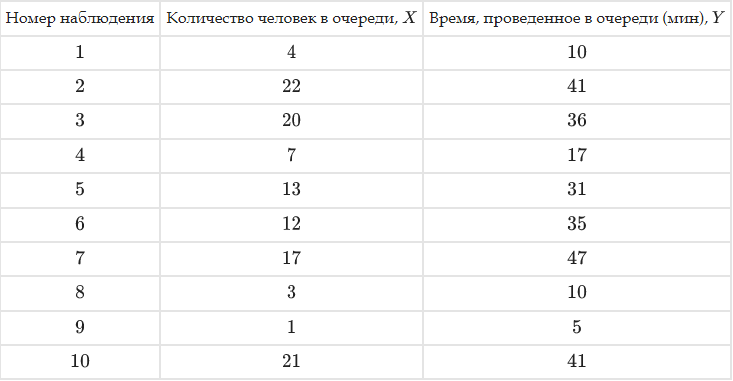


Обучите модель линейной регрессии для прогнозирования и введите указанные параметры:
*   Определите выборочное среднее X
*   Определите выборочное среднее Y
*   Найдите коэффициент Θ0
*   Найдите коэффициент Θ1
*   Оцените точность модели, вычислив R^2 статистику

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
DATA = pd.read_csv("datas.csv", delimiter=',', index_col='id')
DATA

,X,Y
id,,
1,4,10
2,22,41
3,20,36
4,7,17
5,13,31
6,12,35
7,17,47
8,3,10
9,1,5


In [17]:
X = pd.DataFrame(DATA["X"])
Y = pd.DataFrame(DATA["Y"])

# Выборочное среднее для Х
sample_mean_X = np.mean(X)
print(sample_mean_X)

X    12.0
dtype: float64


In [18]:
# Выборочное среднее для Y
sample_mean_Y = np.mean(Y)
print(sample_mean_Y)

Y    27.3
dtype: float64


In [19]:
# Обучение модели
reg = LinearRegression().fit(X, Y)

# Коэф. О0
reg.intercept_

array([5.45658363])

In [20]:
# Коэф. О1
reg.coef_

array([[1.8202847]])

In [24]:
# Коэф. корреляции
X_r = np.array(DATA["X"])
Y_r = np.array(DATA["Y"])
r_xy = np.corrcoef(X_r, Y_r)
print(r_xy)

[[1.         0.93852255]
 [0.93852255 1.        ]]


In [25]:
# Коэфф. R^2 - коэф. детерминации
R_2 = (r_xy)**2
print(R_2)

[[1.         0.88082458]
 [0.88082458 1.        ]]


Задача 2. В прилагаемом файле (candy-data.csv) представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель линейной многомерной регрессии. В качестве предикторов выступают поля: **chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent**, отклик — **winpercent**.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: **Hersheys Milk Chocolate, Payday.**

Обучите модель.

*   Введите предсказанное значение **winpercent** для конфеты **Hersheys Milk Chocolate**
*   Введите предсказанное значение **winpercent** для конфеты **Payday**
*   Введите предсказанное значение **winpercent** для конфеты с параметрами **[1, 1, 1, 0, 0, 0, 0, 0, 1, 0.801, 0,745]**.


In [26]:
DATA_SWEETS = pd.read_csv("candy-data.csv", delimiter=",", index_col="competitorname")
DATA_SWEETS

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [27]:
# обучение модели будем проводить на данных, за исключением некоторых конфет (Hersheys Milk Chocolate, Payday)
train_data = DATA_SWEETS.drop(['Hersheys Milk Chocolate', 'Payday'])
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [28]:
# Отбираем данные для предикторов, удалив два последних столбца
x = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

# Указываем столбец отклика
y = pd.DataFrame(train_data['winpercent'])

In [29]:
# Обучение модели
reg_candy = LinearRegression().fit(x, y)

In [32]:
# Предсказание для конфет, введенных вручную
reg_candy.predict([[1, 1, 1, 0, 0, 0, 0, 0, 1, 0.801, 0.745]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[71.07726767]])

In [33]:
# Предсказание для конфет из задания: Hersheys Milk Chocolate, Payday

# Для Hersheys Milk Chocolate. Выберем его из таблицы:
hersheys_milk_chocolate = DATA_SWEETS.loc['Hersheys Milk Chocolate',:].to_frame().T

# Отбираем данные для предикторов и выполняем предскание с помощиью модели
reg_candy.predict(hersheys_milk_chocolate.drop(['winpercent', 'Y'], axis=1))

array([[52.61863084]])

In [34]:
# Для Payday. Выберем его из таблицы:
payday = DATA_SWEETS.loc['Payday',:].to_frame().T

# Отбираем данные для предикторов и выполняем предскание с помощиью модели
reg_candy.predict(payday.drop(['winpercent', 'Y'], axis=1))

array([[37.62995508]])